# Mount File Barack Obama

In [5]:
import string
from google.colab import drive
drive.mount('/content/drive')
file_path = "/content/drive/MyDrive/STKI-Project/Minggu3/data/barack obama.txt"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data Clean

In [6]:
with open(file_path, "r", encoding="utf-8") as f:
    text = f.read().lower()
clean_text = text.translate(str.maketrans('', '', string.punctuation))
tokens = clean_text.split()
print("20 Token pertama: ", tokens[:20])

20 Token pertama:  ['barack', 'hussein', 'obama', 'ii', 'born', 'august', '4', '1961', 'is', 'the', '44th', 'and', 'current', 'president', 'of', 'the', 'united', 'states', 'he', 'is']


# Visualization Frekuensi Kemunculan

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


the             : 20
in              : 14
and             : 8
he              : 8
his             : 7
of              : 5
to              : 5
law             : 5
obama           : 4
president       : 4
united          : 4
states          : 4
a               : 4
was             : 4
democratic      : 4
born            : 3
is              : 3
2004            : 3
senate          : 3
primary         : 3


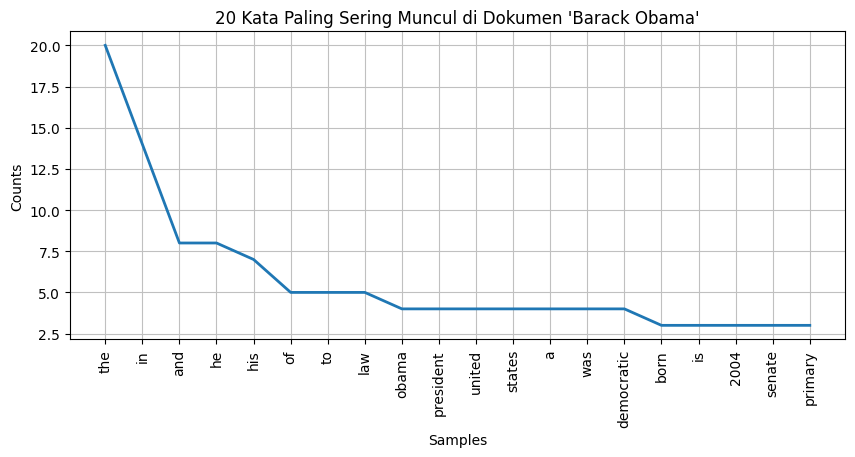

In [7]:
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
import nltk

nltk.download('punkt')

fdist = FreqDist(tokens)

for word, freq in fdist.most_common(20):
    print(f"{word:15} : {freq}")

plt.figure(figsize=(10,4))
fdist.plot(20)
plt.title("20 Kata Paling Sering Muncul di Dokumen 'Barack Obama'")
plt.show()

# Boolean Model

In [13]:
import os
import string

folder_path = "/content/drive/MyDrive/STKI-Project/Minggu3/data"
# Membaca semua dokumen .txt dalam folder dan dimasukkan ke object
documents = {}
for filename in os.listdir(folder_path):
    if filename.endswith(".txt"):
        with open(os.path.join(folder_path, filename), "r", encoding="utf-8") as f:
            documents[filename] = f.read().lower() #all word lower
#clean document
for name in documents:
    documents[name] = documents[name].translate(str.maketrans('', '', string.punctuation))

# Buat daftar term unik dari semua dokumen
terms = set()
for text in documents.values():
    for word in text.split():
        terms.add(word)
terms = sorted(list(terms))

print(f"Total term unik: {len(terms)}\n")

# Membangun incident matrix
incidence_matrix = {}
for term in terms:
    incidence_matrix[term] = []
    for doc in documents:
        if term in documents[doc].split():
            incidence_matrix[term].append(1)
        else:
            incidence_matrix[term].append(0)
for i, term in enumerate(list(terms)[:10]):  # tampilkan head 10 term pertama
    print(f"{term:15} : {incidence_matrix[term]}")

# Evaluasi Boolean Query
def evaluate_query(query):
    query = query.lower().split()
    result = [0] * len(case_incidence.columns)
    operator = None

    for token in query:
        if token in ["and", "or", "not"]:
            operator = token
        else:
            if token in case_incidence.index:
                vec = list(case_incidence.loc[token])
            else:
                vec = [0] * len(case_incidence.columns)

            if operator == "not":
                vec = [int(not x) for x in vec]
                operator = None

    return result

query = input('Cari data: ')
print(f"Query: {query}")
result = evaluate_query(query)

doc_names = list(documents.keys())
print("\nDokumen yang cocok:")
for doc_name, value in zip(doc_names, result):
    if value == 1:
        print("✅", doc_name)

Total term unik: 847

12              : [0, 1, 1, 0, 0, 0, 0, 0]
13th            : [0, 0, 0, 0, 0, 0, 1, 0]
14th            : [1, 0, 0, 0, 0, 0, 0, 0]
16              : [0, 0, 0, 1, 0, 0, 0, 0]
17              : [1, 0, 0, 1, 0, 0, 0, 0]
1923            : [0, 0, 0, 1, 0, 0, 0, 0]
1926            : [0, 1, 0, 0, 0, 0, 0, 1]
1936            : [0, 1, 0, 0, 0, 0, 0, 0]
1947            : [0, 1, 0, 0, 0, 0, 0, 0]
1948            : [0, 0, 1, 0, 0, 0, 0, 0]
Cari data: obama and not queen
Query: obama and not queen

Dokumen yang cocok:
✅ barack obama.txt


# Incident Matrix

In [14]:
import pandas as pd

df = pd.DataFrame(incidence_matrix, index=list(documents.keys())).T
display(df.head(15))  # tampilkan 15 baris pertama

,narendra modi.txt,queen elizabeth.txt,shinzo abe.txt,lee quan yew.txt,badminton.txt,baseball.txt,barack obama.txt,table tennis.txt
12,0,1,1,0,0,0,0,0
13th,0,0,0,0,0,0,1,0
14th,1,0,0,0,0,0,0,0
16,0,0,0,1,0,0,0,0
17,1,0,0,1,0,0,0,0
1923,0,0,0,1,0,0,0,0
1926,0,1,0,0,0,0,0,1
1936,0,1,0,0,0,0,0,0
1947,0,1,0,0,0,0,0,0
1948,0,0,1,0,0,0,0,0


# Studi Kasus

In [23]:
import pandas as pd
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import nltk

# Unduh resource NLTK
nltk.download('punkt')
nltk.download('stopwords')

# PREPROCESSING SEDERHANA
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def preprocess(text):
    text = text.lower()
    text = re.sub(r'[^a-z\\s]', ' ', text)
    tokens = word_tokenize(text)
    tokens = [t for t in tokens if t not in stop_words and len(t) > 2]
    tokens = [stemmer.stem(t) for t in tokens]
    return tokens

# CASE STUDY SESUAI MATERI
case_docs = {
    'Doc1': 'Antony Brutus Caesar',
    'Doc2': 'Brutus Caesar Calpurnia',
    'Doc3': 'Caesar Hamlet',
    'Doc4': 'Brutus Caesar Hamlet'
}

# Buat incidence matrix
case_processed = {k: preprocess(v) for k, v in case_docs.items()}
case_vocab = sorted(set(t for tokens in case_processed.values() for t in tokens))
case_incidence = pd.DataFrame(0, index=case_vocab, columns=list(case_processed.keys()))

for d, tokens in case_processed.items():
    for t in set(tokens):
        case_incidence.at[t, d] = 1

print("CASE INCIDENCE MATRIX")
print(case_incidence)

# Boolean Query
def get_vector(term):
    if term in case_incidence.index:
        return list(case_incidence.loc[term])
    else:
        return [0] * len(case_incidence.columns)

def AND(a, b):
    return [x & y for x, y in zip(a, b)]

def OR(a, b):
    return [x | y for x, y in zip(a, b)]

def NOT(a):
    return [int(not x) for x in a]

# Evaluasi Boolean Query
def boolean_query(query):
    q = query.lower().split()
    result = [0] * len(case_incidence.columns)
    bin_op = None
    not_flag = False

    for token in q:
        if token in ['and', 'or']:
            bin_op = token
        elif token == 'not':
            not_flag = True
        else:
            vec = get_vector(token)
            if not_flag:
                vec = NOT(vec)
                not_flag = False

            if all(v == 0 for v in result):
                result = vec
            else:
                if bin_op == 'and':
                    result = AND(result, vec)
                elif bin_op == 'or':
                    result = OR(result, vec)
                bin_op = None

    # Konversi hasil vektor ke daftar dokumen relevan
    docs = [doc for doc, val in zip(case_incidence.columns, result) if val == 1]
    return docs

# === Uji Query ===
query = "antoni and calpurnia and not hamlet"
print(f"\nQuery: {query}")
print("Dokumen relevan:", boolean_query(query))


=== CASE INCIDENCE MATRIX ===
           Doc1  Doc2  Doc3  Doc4
antoni        1     0     0     0
brutu         1     1     0     1
caesar        1     1     1     1
calpurnia     0     1     0     0
hamlet        0     0     1     1

Query: antoni and calpurnia and not hamlet
Dokumen relevan: ['Doc1', 'Doc2']


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
